# This is a the All Sky Simulation for YSO Targets

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from astropy.table import Table,vstack
import astropy.units as u
from targetlib import testfield_gal,testfield_fk5,testfield_ecl,h2exp
from astropy.coordinates import SkyCoord
from astropy.coordinates import Galactic,FK5,BarycentricTrueEcliptic
%matplotlib inline

# Star Selection Rules
The star selection rules are laid out in detail on this webpage: https://wiki.sdss.org/display/MWM/YSO+selection+function

**Todo outside of sims**
 - Think about separate cadence for boss exposures
 - There is no preferred cadence for boss exposures

## New in Gamma-0
- Updated targets to latest version from Feb 26, 2020
- Removed Cluster targets

In [2]:
ver = 'gamma-0'
yso_tab = Table.read('workspace/target_files/YSO/{}/ysotargeting-0226.fits'.format(ver))
yso_tab

DESIGNATION,RA,DEC,BOSS,PARALLAX,J_M_2MASS,H_M_2MASS,K_M_2MASS,PHOT_G_MEAN_MAG,PHOT_BP_MEAN_MAG,PHOT_RP_MEAN_MAG,W1MPRO,W2MPRO,W3MPRO,W4MPRO,S1,S2,S2_5,S3,OB,CMZ,CLUST
bytes28,float64,float64,int16,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bool,bool,bool,bool,bool,bool,bool
Gaia DR2 431604463341241984,0.010017289661103214,63.71713170432774,4,1.3669851860111404,13.720000267028809,12.996999740600586,12.79699993133545,15.933618545532227,16.78079605102539,15.011147499084473,12.682999610900879,12.732999801635742,11.454999923706055,9.496000289916992,False,False,False,True,False,False,False
1635721458409799680,0.014209315287625012,-20.914268007597002,3,0.5236211763712381,8.63599967956543,8.381999969482422,8.286999702453613,9.642487525939941,9.961844444274902,9.184581756591797,8.26099967956543,8.281999588012695,8.265000343322754,8.185999870300293,False,False,False,False,True,False,False
528988203903276672,0.014323674891032938,68.1157897143162,3,0.8502652049064636,12.609999656677246,12.14900016784668,12.00100040435791,14.868688,15.699005,13.927637,11.70300006866455,11.696000099182129,12.289999961853027,8.72599983215332,False,False,False,False,False,False,True
J000006.45+675349.7,0.0268906,67.8971651,3,0.8714,11.856,11.096,10.525,14.363132,15.354439,13.376985,9.627,9.159,6.953,4.498,True,False,False,False,False,False,True
528985459423408768,0.027671146935143182,67.96384774418541,-1,0.981224000453949,13.550000190734863,12.616999626159668,12.295999526977539,16.850767,18.366426,15.614505,12.154999732971191,12.09000015258789,12.496000289916992,8.942999839782715,False,False,False,False,False,False,True
528607639740035072,0.041183816021420155,67.79902174590075,3,0.9192159175872803,12.923999786376953,12.130999565124512,11.892000198364258,15.582217,16.730835,14.507209,11.76200008392334,11.770999908447266,12.067000389099121,8.970000267028809,False,False,False,False,False,False,True
Gaia DR2 538037051459081856,0.04969500175307085,74.47475298992195,3,1.1533771334154514,13.428000450134277,12.861000061035156,12.652000427246094,15.511549949645996,16.190486907958984,14.602104187011719,12.437000274658203,12.487000465393066,11.753999710083008,9.305000305175781,False,False,False,True,False,False,False
Gaia DR2 429950007577101952,0.0537805339342776,62.496650295907386,3,1.0837072903705394,12.930000305175781,12.489999771118164,12.376999855041504,14.668299674987793,15.250387191772461,13.940083503723145,12.317000389099121,12.388999938964844,13.057999610900879,9.737000465393066,False,False,False,True,False,False,False
529126501849762816,0.059846545120721795,68.71621301678837,3,0.8876559138298035,11.093000411987305,10.97700023651123,10.862000465393066,12.467026,12.949165,11.8181305,10.793999671936035,10.817000389099121,11.72700023651123,9.107999801635742,False,False,False,False,False,False,True


## Plot Hmag distribution of targets

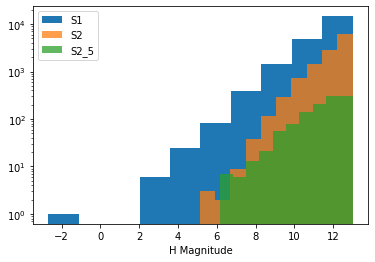

In [3]:
plt.hist(yso_tab['H_M_2MASS'][(yso_tab['S1'] == True)],label='S1')
plt.hist(yso_tab['H_M_2MASS'][(yso_tab['S2'] == True)],label='S2',alpha=0.75)
plt.hist(yso_tab['H_M_2MASS'][(yso_tab['S2_5'] == True)],label='S2_5',alpha=0.75)
plt.yscale('log')
plt.xlabel('H Magnitude')
plt.legend()
plt.show()

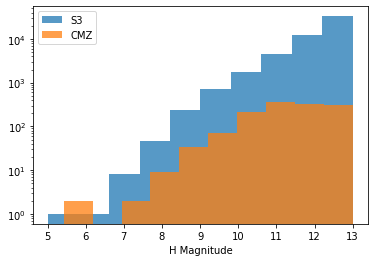

In [4]:
#plt.hist(yso_tab['H_M_2MASS'][(yso_tab['CLUST'] == True)],label='CLUST')
plt.hist(yso_tab['H_M_2MASS'][(yso_tab['S3'] == True)],label='S3',alpha=0.75)
plt.hist(yso_tab['H_M_2MASS'][(yso_tab['CMZ'] == True)],label='CMZ',alpha=0.75)
plt.yscale('log')
plt.xlabel('H Magnitude')
plt.legend()
plt.show()

## Plot All Targets

/home/deleenm/Dropbox/Research/notebooks/SDSS-V SimTargets/allsky/targetlib.py:148: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  bmap = Basemap(projection='moll', lon_0=180,lat_0=0)


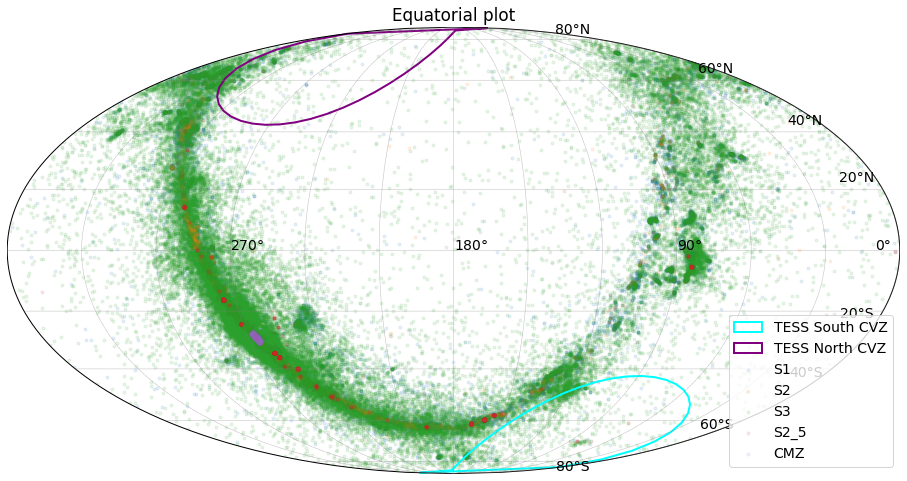

In [5]:
plt.rcParams.update({'font.size': 14})
(fig,bmap) = testfield_fk5()
#Plot YSO Targets
s1x,s1y = bmap(yso_tab['RA'][(yso_tab['S1'] == True)],yso_tab['DEC'][(yso_tab['S1'] == True)])
bmap.scatter(s1x,s1y,marker='.',label='S1',alpha=0.1)
s2x,s2y = bmap(yso_tab['RA'][(yso_tab['S2'] == True)],yso_tab['DEC'][(yso_tab['S2'] == True)])
bmap.scatter(s2x,s2y,marker='.',label='S2',alpha=0.1)
s3x,s3y = bmap(yso_tab['RA'][(yso_tab['S3'] == True)],yso_tab['DEC'][(yso_tab['S3'] == True)])
bmap.scatter(s3x,s3y,marker='.',label='S3',alpha=0.1)
s2_5x,s2_5y = bmap(yso_tab['RA'][(yso_tab['S2_5'] == True)],yso_tab['DEC'][(yso_tab['S2_5'] == True)])
bmap.scatter(s2_5x,s2_5y,marker='.',label='S2_5',alpha=0.1)
#clustx,clusty = bmap(yso_tab['RA'][(yso_tab['CLUST'] == True)],yso_tab['DEC'][(yso_tab['CLUST'] == True)])
#bmap.scatter(clustx,clusty,marker='.',label='CLUST',alpha=0.1)
cmzx,cmzy = bmap(yso_tab['RA'][(yso_tab['CMZ'] == True)],yso_tab['DEC'][(yso_tab['CMZ'] == True)])
bmap.scatter(cmzx,cmzy,marker='.',label='CMZ',alpha=0.1)
plt.title("Equatorial plot")
plt.legend(loc=4)
plt.show()

## Create Target Table

In [6]:
target_tab = Table()

## Remove Cluster stars from list
We are not currently doing cluster targets

In [7]:
yso_sm_tab = yso_tab[(yso_tab['CLUST'] == False) & (yso_tab['OB'] == False) ]
yso_sm_tab

DESIGNATION,RA,DEC,BOSS,PARALLAX,J_M_2MASS,H_M_2MASS,K_M_2MASS,PHOT_G_MEAN_MAG,PHOT_BP_MEAN_MAG,PHOT_RP_MEAN_MAG,W1MPRO,W2MPRO,W3MPRO,W4MPRO,S1,S2,S2_5,S3,OB,CMZ,CLUST
bytes28,float64,float64,int16,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bool,bool,bool,bool,bool,bool,bool
Gaia DR2 431604463341241984,0.010017289661103214,63.71713170432774,4,1.3669851860111404,13.720000267028809,12.996999740600586,12.79699993133545,15.933618545532227,16.78079605102539,15.011147499084473,12.682999610900879,12.732999801635742,11.454999923706055,9.496000289916992,False,False,False,True,False,False,False
Gaia DR2 538037051459081856,0.04969500175307085,74.47475298992195,3,1.1533771334154514,13.428000450134277,12.861000061035156,12.652000427246094,15.511549949645996,16.190486907958984,14.602104187011719,12.437000274658203,12.487000465393066,11.753999710083008,9.305000305175781,False,False,False,True,False,False,False
Gaia DR2 429950007577101952,0.0537805339342776,62.496650295907386,3,1.0837072903705394,12.930000305175781,12.489999771118164,12.376999855041504,14.668299674987793,15.250387191772461,13.940083503723145,12.317000389099121,12.388999938964844,13.057999610900879,9.737000465393066,False,False,False,True,False,False,False
Gaia DR2 429378021012696704,0.12101939805375671,60.79069275772579,-1,0.45337952152362276,13.810999870300293,12.972000122070312,12.779999732971191,16.604877471923828,17.681800842285156,15.508753776550293,12.607999801635742,12.661999702453613,12.49899959564209,9.156000137329102,False,False,False,True,False,False,False
J000033.96+565012.5,0.1415284,56.8368098,3,0.8706,11.513,10.75,10.318,14.307512,15.409231,13.267935,9.211,8.074,4.501,2.422,True,False,False,False,False,False,False
Gaia DR2 386604132462143360,0.14174096246861187,45.65775169615367,3,2.7788940189932063,11.04699993133545,10.543999671936035,10.395999908447266,12.846550941467285,13.426948547363281,12.100345611572266,10.336999893188477,10.338000297546387,10.217000007629395,8.836000442504883,False,False,False,True,False,False,False
Gaia DR2 529023048976962048,0.14585800631560783,68.4522080030719,3,0.9968674025268038,12.861000061035156,12.057999610900879,11.807999610900879,15.614815711975098,16.766021728515625,14.524778366088867,11.678999900817871,11.67199993133545,11.680999755859375,8.63700008392334,False,False,False,True,False,False,False
Gaia DR2 528573859823454336,0.1585699,67.4605651,-1,0.9864,13.865,12.611,11.939,18.08832,19.78373,16.621609,10.923,10.46,8.066,4.82,True,False,False,True,False,False,False
Gaia DR2 2855256260806690816,0.16424070187365214,29.541512230583777,3,1.4932242283129473,13.263999938964844,12.631999969482422,12.550999641418457,14.882619857788086,15.48486328125,14.139107704162598,12.427000045776367,12.449000358581543,11.781000137329102,9.119999885559082,False,False,False,True,False,False,False


## Determine Cadence type
Stars with H mag < 11.5 get 3 visits and dimmer stars get 6 visits

In [8]:
cadence_arr = np.repeat('mwm_yso_6x1',len(yso_sm_tab))
cadence_arr[(yso_sm_tab['H_M_2MASS'] < 11.5)] = 'mwm_yso_3x1'

In [9]:
target_tab['ra'] = yso_sm_tab['RA']
target_tab['dec'] = yso_sm_tab['DEC']
target_tab['cadence'] = cadence_arr
target_tab

ra,dec,cadence
float64,float64,str11
0.010017289661103214,63.71713170432774,mwm_yso_6x1
0.04969500175307085,74.47475298992195,mwm_yso_6x1
0.0537805339342776,62.496650295907386,mwm_yso_6x1
0.12101939805375671,60.79069275772579,mwm_yso_6x1
0.1415284,56.8368098,mwm_yso_3x1
0.14174096246861187,45.65775169615367,mwm_yso_3x1
0.14585800631560783,68.4522080030719,mwm_yso_6x1
0.1585699,67.4605651,mwm_yso_6x1
0.16424070187365214,29.541512230583777,mwm_yso_6x1


## Set type

In [10]:
type_arr = np.repeat('XXXXXX',len(yso_sm_tab))
type_arr[(yso_sm_tab['S1'] == True)] = 'YSO_S1'
type_arr[(yso_sm_tab['S2'] == True)] = 'YSO_S2'
type_arr[(yso_sm_tab['S2_5'] == True)] = 'YSO_S2_5'
type_arr[(yso_sm_tab['S3'] == True)] = 'YSO_S3'
type_arr[(yso_sm_tab['CMZ'] == True)] = 'YSO_CMZ'
target_tab['type'] = type_arr
target_tab

ra,dec,cadence,type
float64,float64,str11,str6
0.010017289661103214,63.71713170432774,mwm_yso_6x1,YSO_S3
0.04969500175307085,74.47475298992195,mwm_yso_6x1,YSO_S3
0.0537805339342776,62.496650295907386,mwm_yso_6x1,YSO_S3
0.12101939805375671,60.79069275772579,mwm_yso_6x1,YSO_S3
0.1415284,56.8368098,mwm_yso_3x1,YSO_S1
0.14174096246861187,45.65775169615367,mwm_yso_3x1,YSO_S3
0.14585800631560783,68.4522080030719,mwm_yso_6x1,YSO_S3
0.1585699,67.4605651,mwm_yso_6x1,YSO_S3
0.16424070187365214,29.541512230583777,mwm_yso_6x1,YSO_S3


## Set priority
For now, no priority differences among targets. Setting to default of 5

In [11]:
target_tab['priority'] = np.repeat(np.array(5,dtype='int32'),len(yso_sm_tab))
target_tab['value'] = np.repeat(np.array(1.0,dtype='float32'),len(yso_sm_tab))

In [12]:
target_tab

ra,dec,cadence,type,priority,value
float64,float64,str11,str6,int32,float32
0.010017289661103214,63.71713170432774,mwm_yso_6x1,YSO_S3,5,1.0
0.04969500175307085,74.47475298992195,mwm_yso_6x1,YSO_S3,5,1.0
0.0537805339342776,62.496650295907386,mwm_yso_6x1,YSO_S3,5,1.0
0.12101939805375671,60.79069275772579,mwm_yso_6x1,YSO_S3,5,1.0
0.1415284,56.8368098,mwm_yso_3x1,YSO_S1,5,1.0
0.14174096246861187,45.65775169615367,mwm_yso_3x1,YSO_S3,5,1.0
0.14585800631560783,68.4522080030719,mwm_yso_6x1,YSO_S3,5,1.0
0.1585699,67.4605651,mwm_yso_6x1,YSO_S3,5,1.0
0.16424070187365214,29.541512230583777,mwm_yso_6x1,YSO_S3,5,1.0


In [13]:
target_tab.write('{}/mwm_yso_target_{}.fits'.format(ver,ver),overwrite=True)

## Create Cadence Table
Targets Hmag < 11.5 get 3 visits (delta time between visits ~day then ~month)
Targets Hmag 11.5 to 13 get 6 visits (delta time ~day then ~month, and then a minimum of every 2 days)

In [14]:
cadence_tab = Table()

In [15]:
cadence_tab['cadence'] = np.array(['mwm_yso_3x1', 'mwm_yso_6x1'])
cadence_tab['nepochs'] = np.array([3,6],dtype='int32')
delta = np.array([[0,1,30,np.nan,np.nan,np.nan]
                ,[0,1,30,2,2,2]],dtype='float32')
print(delta)
cadence_tab['delta'] = delta

[[ 0.  1. 30. nan nan nan]
 [ 0.  1. 30.  2.  2.  2.]]


In [16]:
cadence_tab

cadence,nepochs,delta [6]
str11,int32,float32
mwm_yso_3x1,3,0.0 .. nan
mwm_yso_6x1,6,0.0 .. 2.0


In [17]:
delta_min = np.array([[0,1,20,np.nan,np.nan,np.nan]
                ,[0,1,20,2,2,2]],dtype='float32')

print(delta_min)
cadence_tab['delta_min'] = delta_min

[[ 0.  1. 20. nan nan nan]
 [ 0.  1. 20.  2.  2.  2.]]


In [18]:
delta_max = np.array([[0,60,180,np.nan,np.nan,np.nan]
                ,[0,60,180,180,180,180]],dtype='float32')

print(delta_max)
cadence_tab['delta_max'] = delta_max

[[  0.  60. 180.  nan  nan  nan]
 [  0.  60. 180. 180. 180. 180.]]


In [19]:
lunation = np.array([[1,1,1,np.nan,np.nan,np.nan]
                ,[1,1,1,1,1,1]],dtype='float32')
print(lunation)
cadence_tab['lunation'] = lunation

[[ 1.  1.  1. nan nan nan]
 [ 1.  1.  1.  1.  1.  1.]]


In [20]:
instrument = np.array([['apogee','apogee','apogee',np.nan,np.nan,np.nan]
                ,['apogee','apogee','apogee','apogee','apogee','apogee']],dtype='str')
print(instrument)
cadence_tab['instrument'] = instrument

[['apogee' 'apogee' 'apogee' 'nan' 'nan' 'nan']
 ['apogee' 'apogee' 'apogee' 'apogee' 'apogee' 'apogee']]


In [21]:
cadence_tab

cadence,nepochs,delta [6],delta_min [6],delta_max [6],lunation [6],instrument [6]
str11,int32,float32,float32,float32,float32,str6
mwm_yso_3x1,3,0.0 .. nan,0.0 .. nan,0.0 .. nan,1.0 .. nan,apogee .. nan
mwm_yso_6x1,6,0.0 .. 2.0,0.0 .. 2.0,0.0 .. 180.0,1.0 .. 1.0,apogee .. apogee


In [22]:
cadence_tab.write('{}/mwm_yso_cadence_{}.fits'.format(ver,ver),overwrite=True)

In [23]:
test =  Table.read('{}/mwm_yso_cadence_{}.fits'.format(ver,ver))
test

cadence,nepochs,delta [6],delta_min [6],delta_max [6],lunation [6],instrument [6]
bytes11,int32,float32,float32,float32,float32,bytes24
mwm_yso_3x1,3,0.0 .. nan,0.0 .. nan,0.0 .. nan,1.0 .. nan,apogee .. nan
mwm_yso_6x1,6,0.0 .. 2.0,0.0 .. 2.0,0.0 .. 180.0,1.0 .. 1.0,apogee .. apogee
